In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.font_manager as fm
from matplotlib import rcParams
# rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
myfont16 = fm.FontProperties(fname=r'/home/hsiung/labs/NimbusRomNo9L-Reg.otf', size=16)
myfont18 = fm.FontProperties(fname=r'/home/hsiung/labs/NimbusRomNo9L-Reg.otf', size=18)

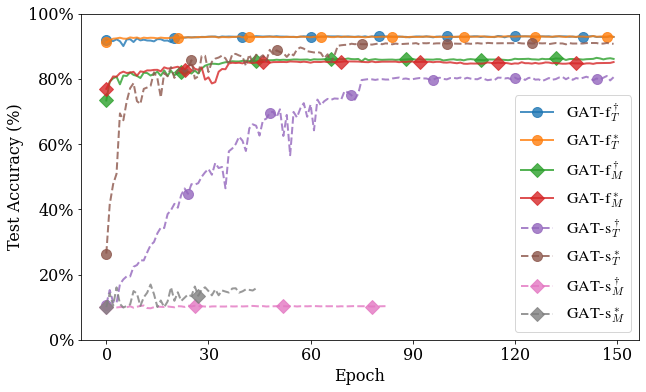

In [2]:
import pandas as pd
df = pd.read_csv('result/cifar-training-record-2.csv')
labels = ['GAT-f$^\dagger_T$','GAT-f$^*_T$','GAT-f$^\dagger_M$','GAT-f$^*_M$',
          'GAT-s$^\dagger_T$','GAT-s$^*_T$','GAT-s$^\dagger_M$','GAT-s$^*_M$']
# markers = ['o','D','p','^','d','s','x','*']
markers = ['o','o','D','D','o','o','D','D']
lines = ['-','-','-','-','--','--','--','--']
fig, ax = plt.subplots(figsize=(10,6))
for col_id in range(len(labels)):
    ax.plot(df.iloc[:,0], df.iloc[:,col_id+1]*100, label=labels[col_id],  
            marker=markers[col_id], linestyle=lines[col_id], linewidth=2, markersize=10,markevery=20+col_id,alpha=0.8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test Accuracy (%)', fontsize=16)
ax.set_xlabel('Epoch', fontsize=16)
# ax.set_title('Scores by group and gender')
# ax.set_xticks(X)
# ax.set_xticklabels(labels)
plt.xticks([0,30,60,90,120,150], fontsize=16)
plt.yticks([0,20,40,60,80,100], fontsize=16)
plt.ticklabel_format(axis='y', useMathText=True)
plt.ticklabel_format(axis='x', useMathText=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.legend(loc='lower right',prop=myfont16)
plt.savefig("result/training_record.pdf")
plt.show()
# ax.get_yaxis().set_visible(False)

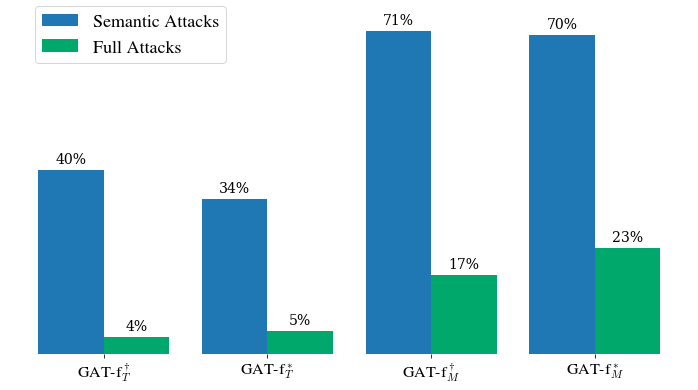

In [3]:
labels = ['GAT-f$^\dagger_T$','GAT-f$^*_T$','GAT-f$^\dagger_M$','GAT-f$^*_M$',
          'GAT-s$^\dagger_T$','GAT-s$^*_T$','GAT-s$^\dagger_M$','GAT-s$^*_M$']
data = [
    [0.404100001,0.340399981,0.712700009,0.702699959,0.0682,0.191100001,0,0],
    [0.037299998,0.049899999,0.173899993,0.232499987,0,0,0,0]]

data = [[round(prec,4) for prec in item] for item in data]
X = np.arange(len(labels[:4]))
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5.5))
semantic_attack = ax.bar(X - 0.2, data[0][:4], width=width, label='Semantic Attacks')
full_attack = ax.bar(X + 0.2, data[1][:4], color="#00A86B", width=width, label='Full Attacks')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Attack Success Rate', fontsize=14)
# ax.set_title('Scores by group and gender')
ax.set_xticks(X)
ax.set_xticklabels(labels[:4])
plt.xticks(fontproperties=myfont16)
plt.ticklabel_format(axis='y', useMathText=True)

ax.legend(loc='best',bbox_to_anchor=(0.333,1.05), prop=myfont18)

ax.get_yaxis().set_visible(False)
# ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)

# ax.bar_label(semantic_attack, fmt='%g', padding=3, fontsize=14)
# ax.bar_label(full_attack, padding=3, fontsize=14)
# ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:0.00%}', (x + width/2, y + height+0.015), ha='center', fontsize=14)


fig.tight_layout()

plt.savefig("result/appendix-ra.pdf")
plt.show()